In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
FILE_NAME = "german.data.txt"

attr_list = ["checking account status", "duration in month", "credit history", \
          "purpose", "credit amount", "savings account/bonds", "employment",\
          "installment rate", "status and sex", "debtors/guarantors",\
         "residence since", "property", "age", "installment plans", "housing",\
         "existing credits", "job", "dependent people", "telephone", "foreign",\
         "credit"]
data = pd.read_csv(FILE_NAME, sep=" ", names=attr_list)
data = data.dropna()
print(data.shape)
data.head()

(1000, 21)


,checking account status,duration in month,credit history,purpose,credit amount,savings account/bonds,employment,installment rate,status and sex,debtors/guarantors,...,property,age,installment plans,housing,existing credits,job,dependent people,telephone,foreign,credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
# 1 is good, 2 is bad.
# convert to 1=good, 0=bad
data['credit'] = np.where(data['credit'] == 2, 0,1)
data.head()

,checking account status,duration in month,credit history,purpose,credit amount,savings account/bonds,employment,installment rate,status and sex,debtors/guarantors,...,property,age,installment plans,housing,existing credits,job,dependent people,telephone,foreign,credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


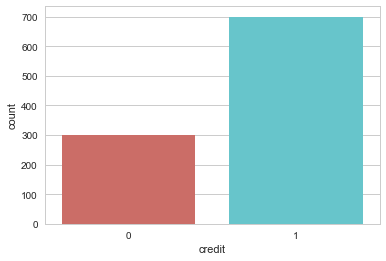

In [4]:
sns.countplot(x='credit',data=data, palette='hls')
plt.show()

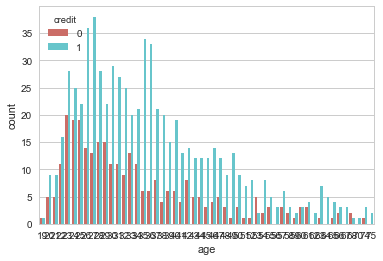

In [5]:
sns.countplot(x='age',data=data, palette='hls', hue='credit')
plt.show()

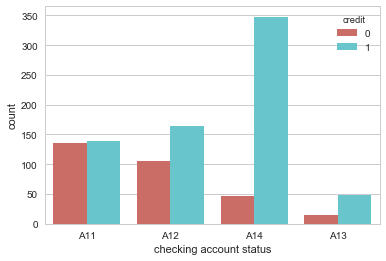

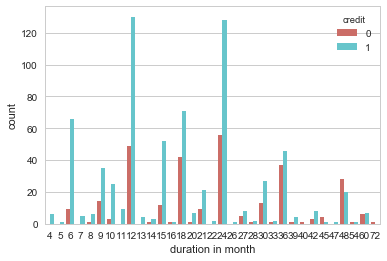

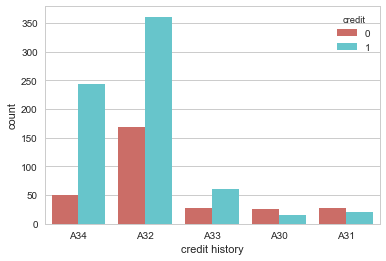

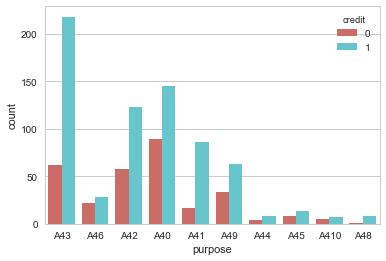

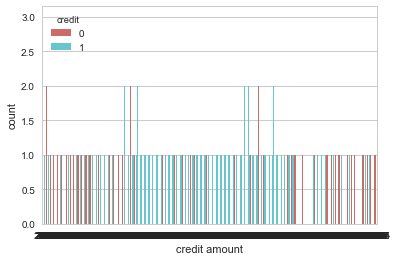

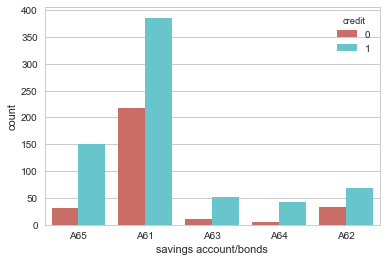

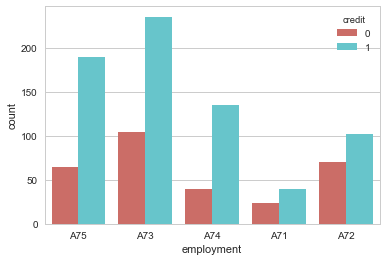

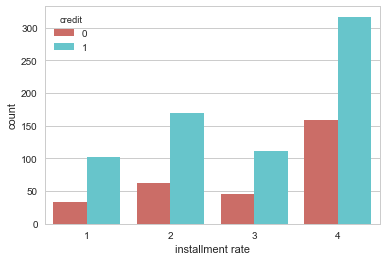

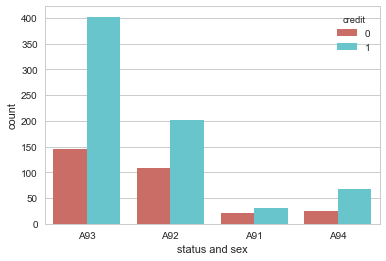

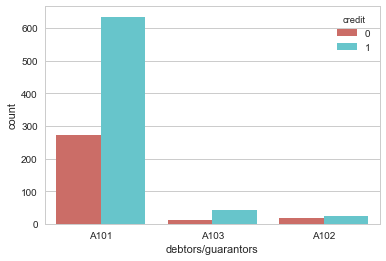

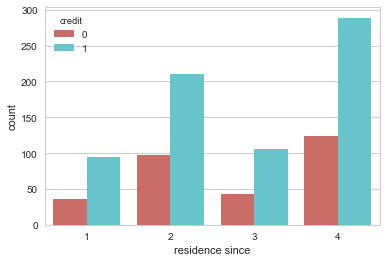

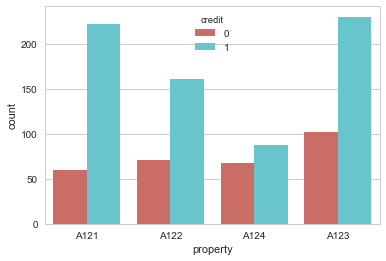

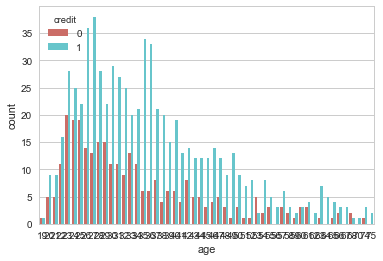

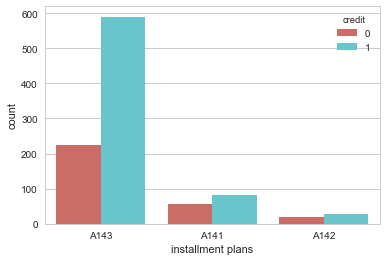

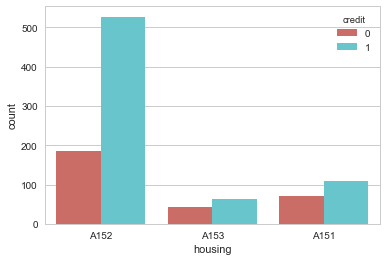

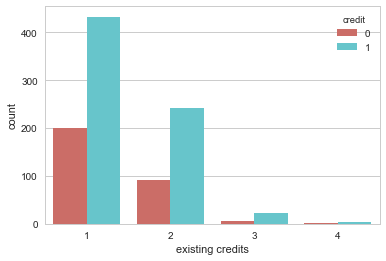

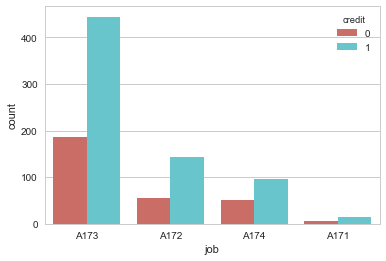

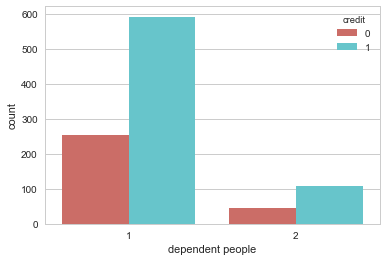

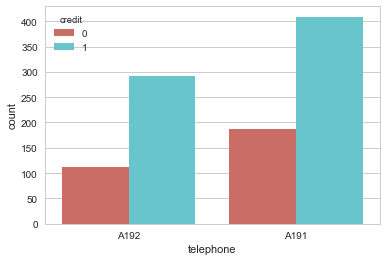

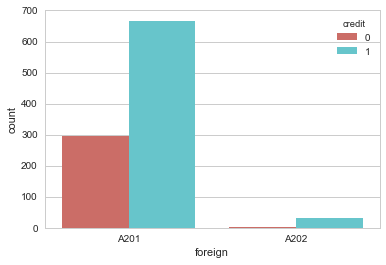

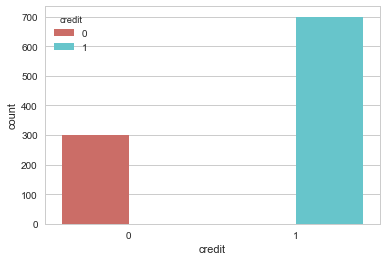

In [6]:
for attribute in attr_list:
    sns.countplot(x=attribute, data=data, palette='hls', hue='credit')
    plt.show()

In [7]:
categorical = data.select_dtypes(exclude=np.int64).columns
print(categorical)
data2 = pd.get_dummies(data, columns = categorical)
data2.head()
# data2.shape

Index(['checking account status', 'credit history', 'purpose',
       'savings account/bonds', 'employment', 'status and sex',
       'debtors/guarantors', 'property', 'installment plans', 'housing', 'job',
       'telephone', 'foreign'],
      dtype='object')


,duration in month,credit amount,installment rate,residence since,age,existing credits,dependent people,credit,checking account status_A11,checking account status_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_A201,foreign_A202
0,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0


In [8]:
X = data2.drop(['credit'], axis = 1)
y = data2['credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# print(X_train.shape)
X_train.head()

,duration in month,credit amount,installment rate,residence since,age,existing credits,dependent people,checking account status_A11,checking account status_A12,checking account status_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_A201,foreign_A202
253,24,4151,2,3,35,2,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
667,48,3609,1,1,27,1,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
85,12,1412,4,2,29,2,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
969,11,3939,1,2,40,2,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
75,12,1526,4,4,66,2,1,1,0,0,...,0,1,0,0,0,1,1,0,1,0


In [10]:
y_train.head()

253    1
667    1
85     1
969    1
75     1
Name: credit, dtype: int64

In [11]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

It is worse to class a customer as good when they are bad (5), 
than it is to class a customer as bad when they are good (1).

|   | bad | good |
|---|---|---|
| bad | 0 | 1 |
| good | 5 | 0 |



In [12]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
from pretty_confusion_matrix import print_cm
print_cm(confusion_matrix, labels = ['bad', 'good'])
# print(confusion_matrix)

            bad  good 
      bad  36.0  38.0 
     good  27.0 149.0 


In [13]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.57      0.49      0.53        74
          1       0.80      0.85      0.82       176

avg / total       0.73      0.74      0.73       250

